In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import helpers
import pandas as pd
from skimage import exposure
from PIL import Image
from scipy import ndimage


In [2]:
filename = 'benoitdata/F20-14A/HA-900_6um_jamtveit_att_pag-2.29_3.40_02043.tif'

img = cv2.imread(filename,0)

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>)

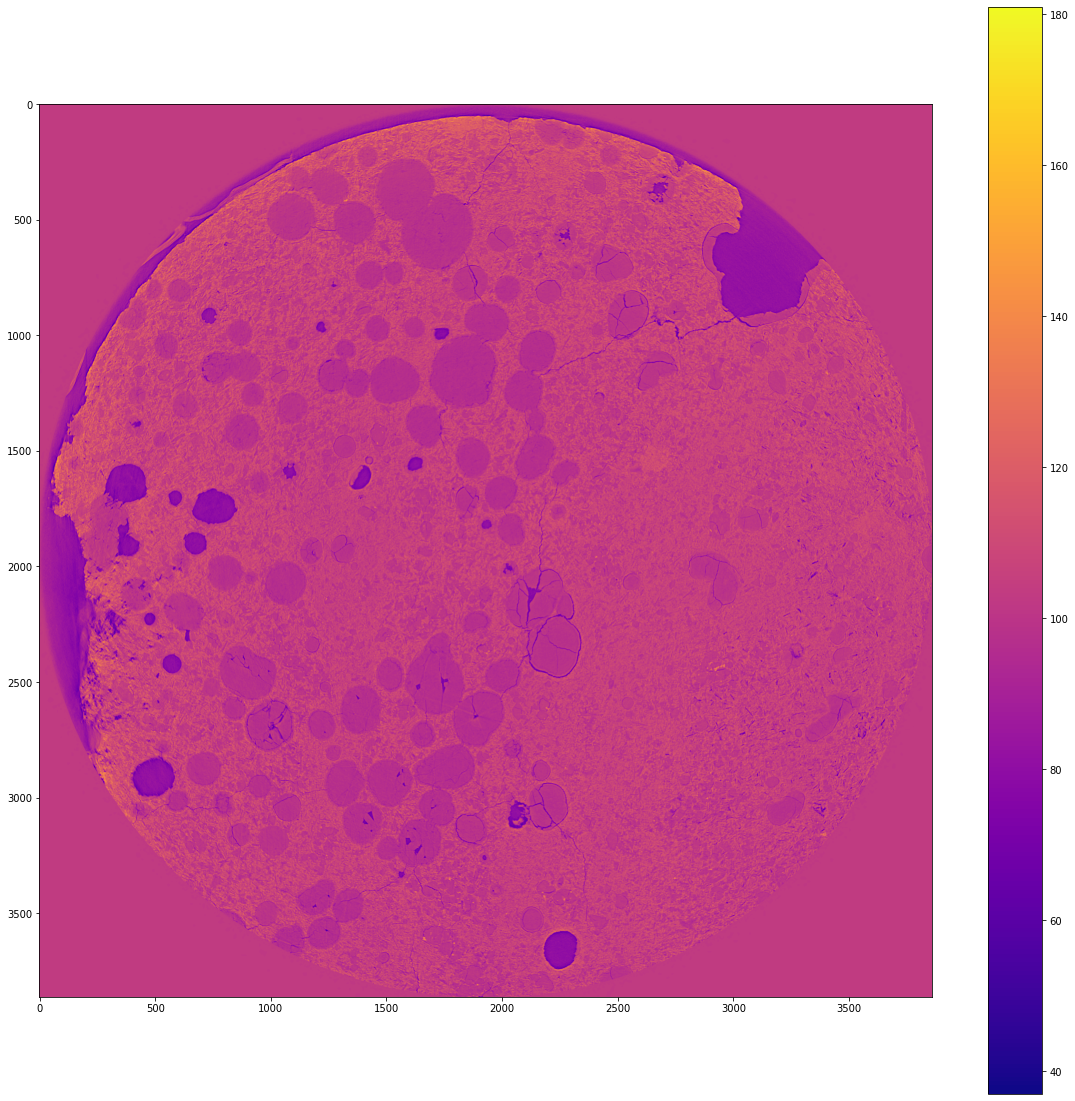

In [3]:
helpers.plot_image(img)

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>)

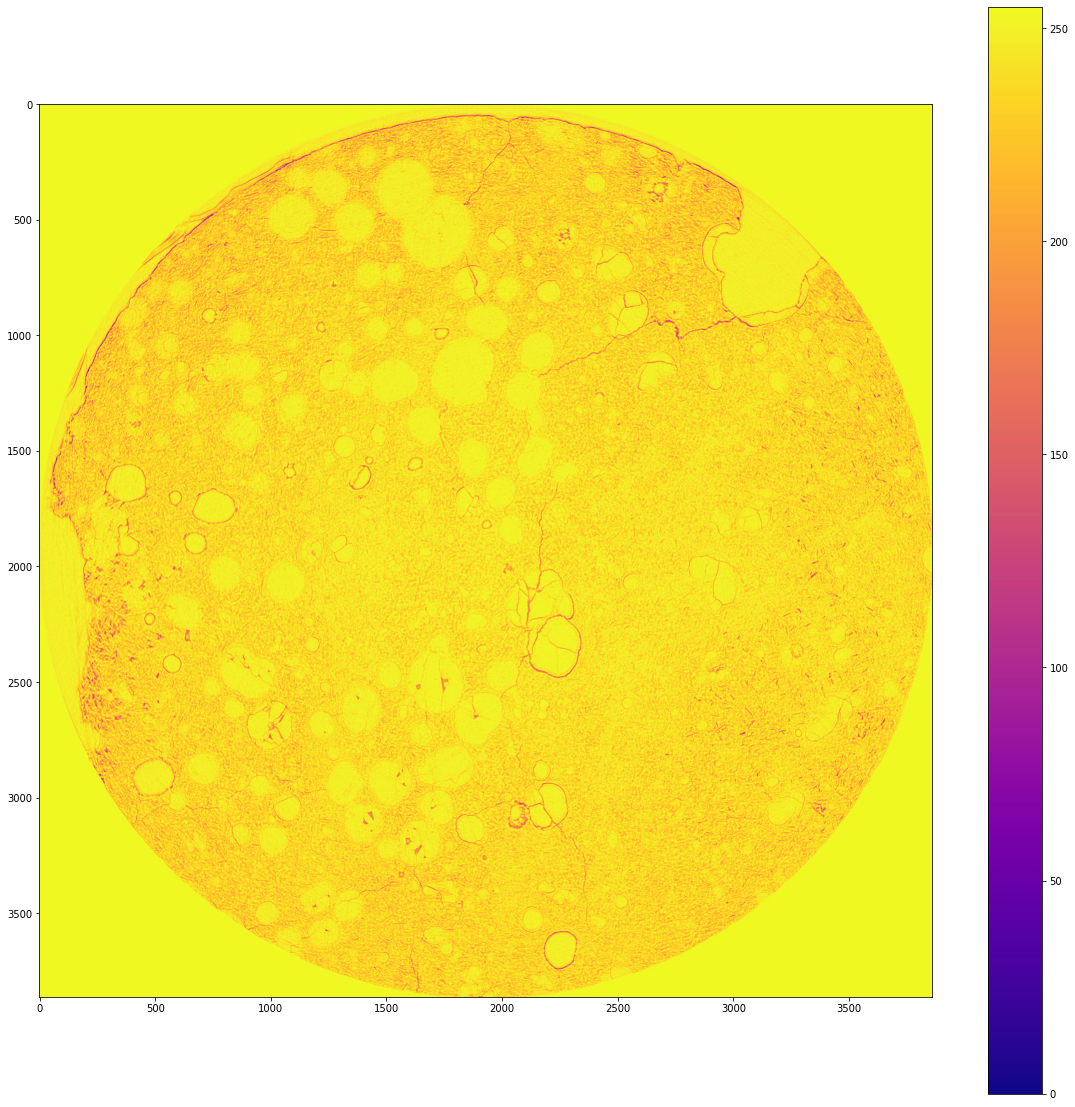

In [4]:
helpers.plot_image(helpers.fix_brightness(img))

array([  0, 255], dtype=uint8)

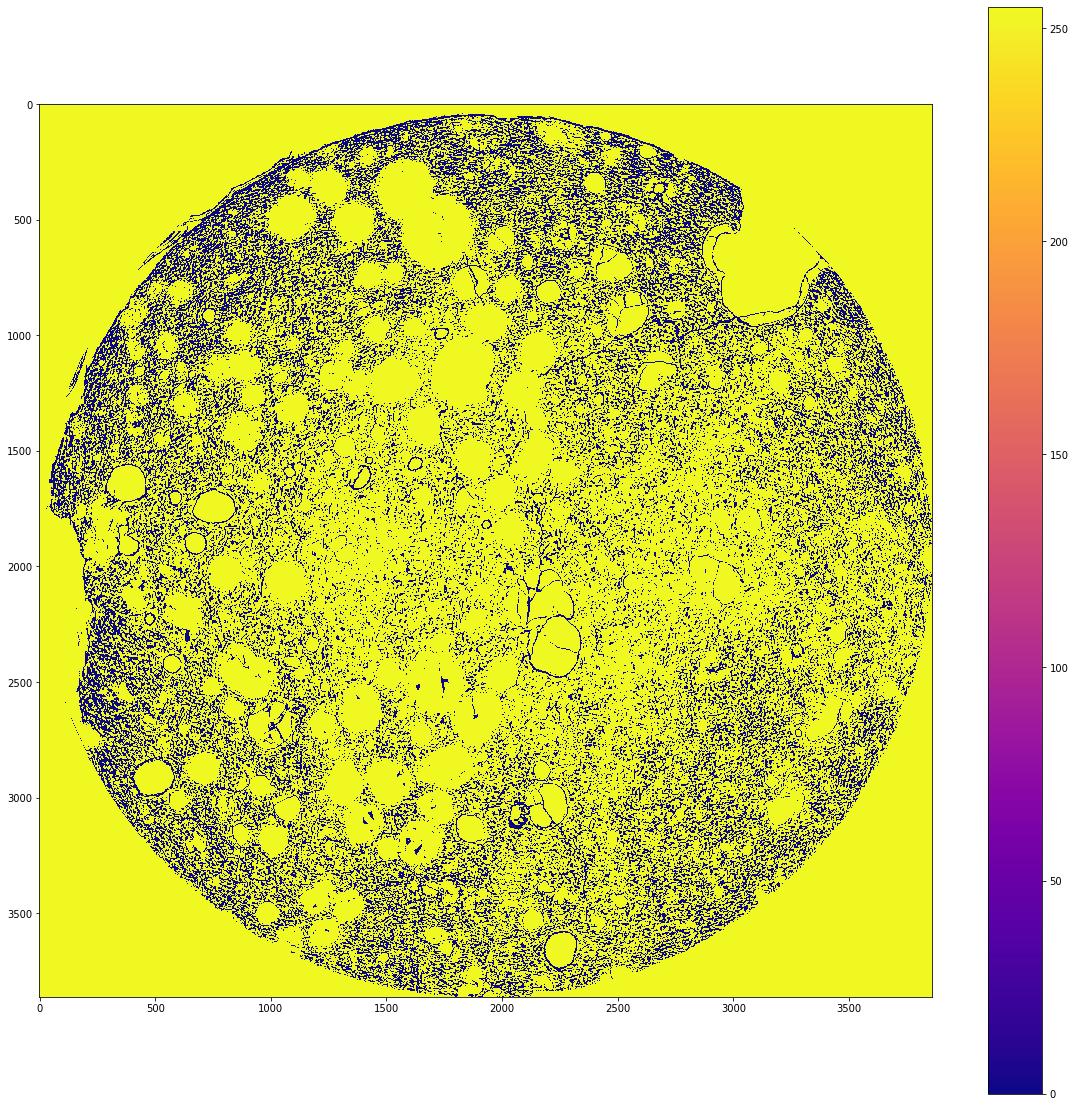

In [5]:
# global thresholding
# ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
# ret3,th3 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
i = img.copy()
i = helpers.fix_brightness(i)

blur = cv2.GaussianBlur(i,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_OTSU)


i =th3
i = cv2.erode(th3, np.ones((2, 2), np.uint8))
i = cv2.dilate(th3, np.ones((3, 3), np.uint8))

helpers.plot_image(i, interpolation='none')
np.unique(th3)

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>)

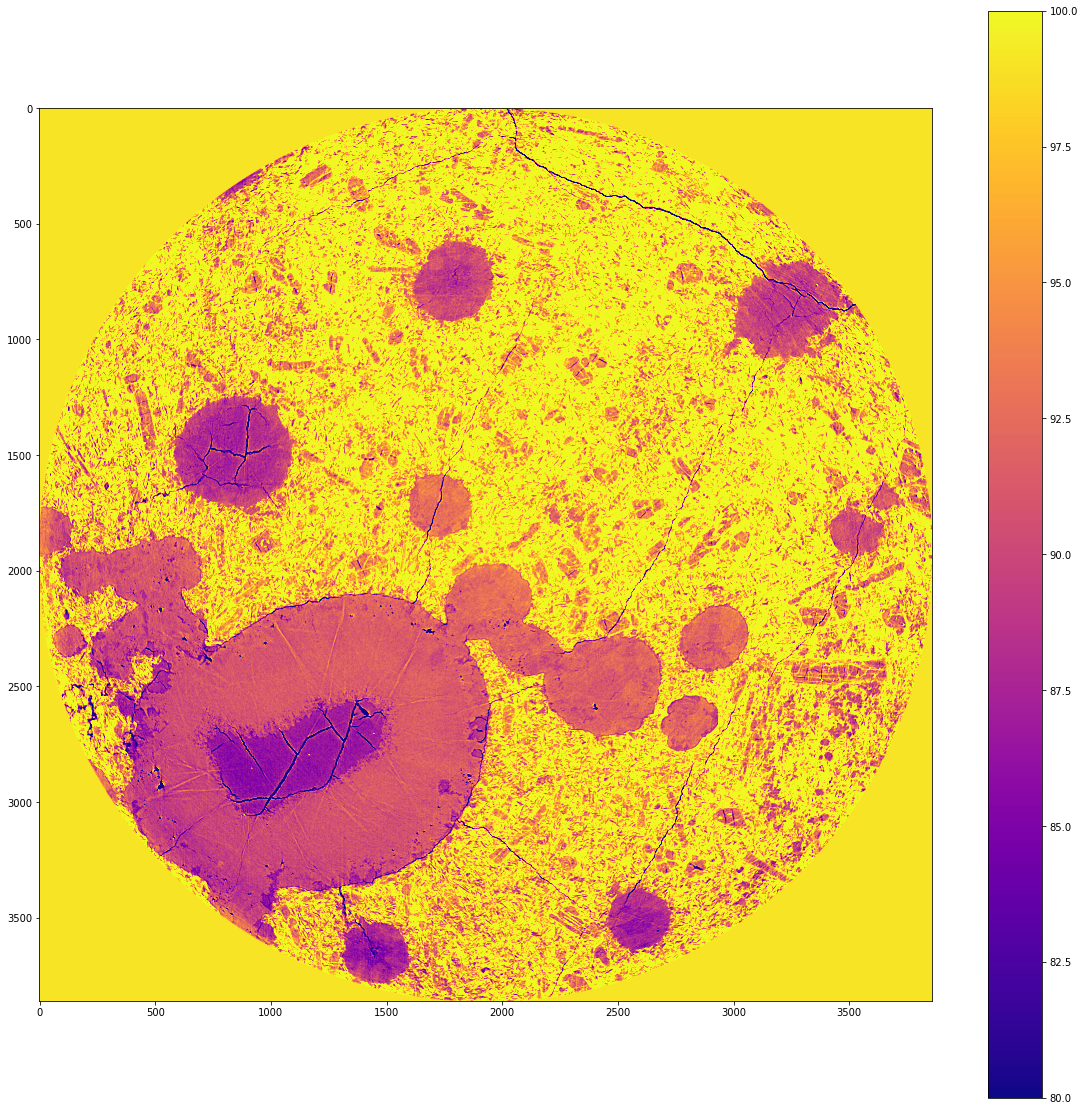

In [6]:
filename = 'benoitdata/F20_10_b/6um_jamtveit_att_pag-1.99_3.12_00030.tif'

img = cv2.imread(filename,0)
helpers.plot_image(img, vmin=80, vmax=100)

array([  0, 255], dtype=uint8)

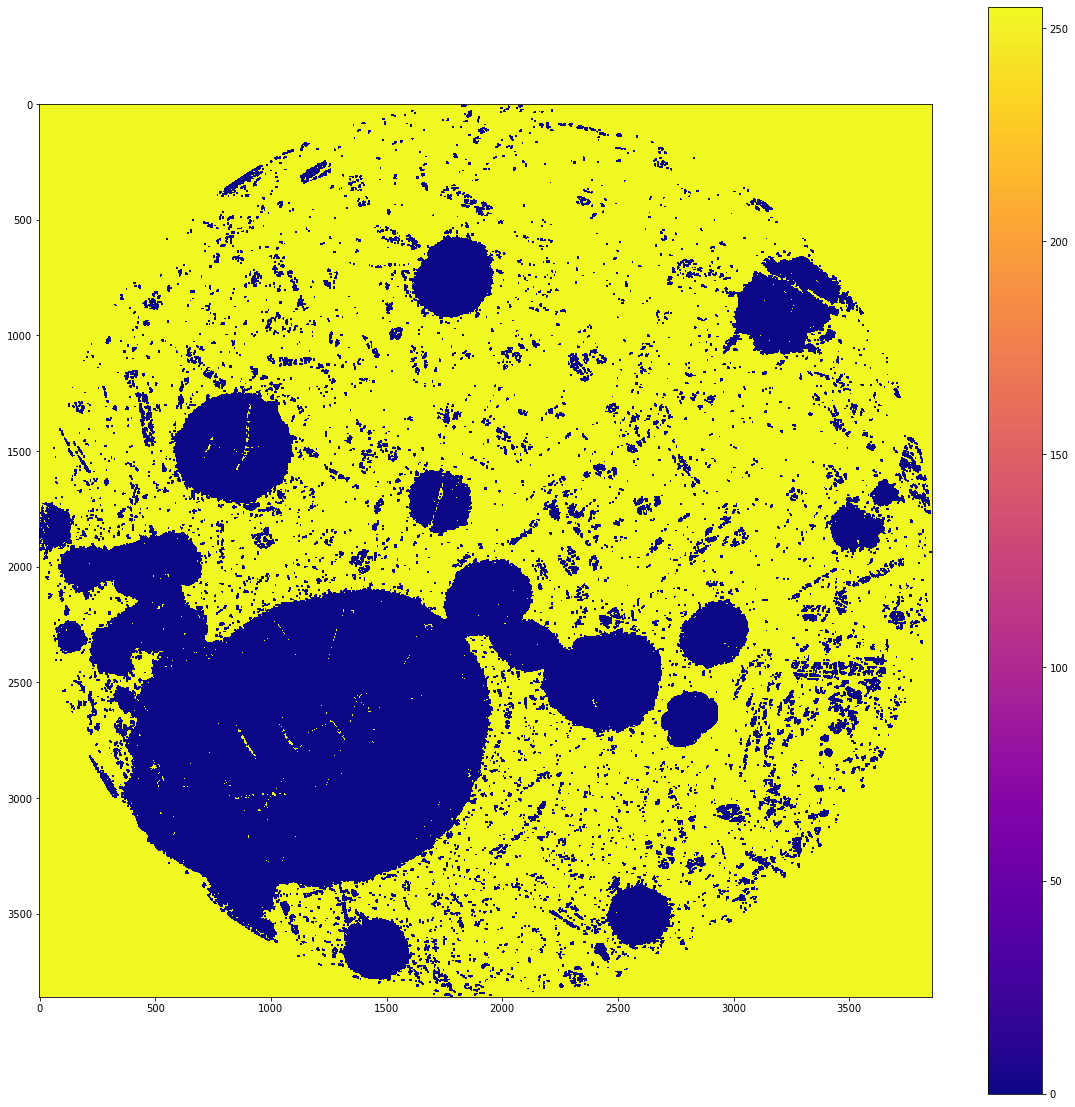

In [7]:
filename = 'benoitdata/F20_10_b/6um_jamtveit_att_pag-1.99_3.12_00030.tif'

img = cv2.imread(filename,0)

i = img.copy()
# i = helpers.fix_brightness(i)

# i = cv2.GaussianBlur(i,(5,5),0)
ret3,th3 = cv2.threshold(i,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_OTSU)


i =th3
i = cv2.dilate(th3, np.ones((7, 7), np.uint8))
i = cv2.erode(i, np.ones((7, 7), np.uint8))
# i = cv2.dilate(i, np.ones((7, 7), np.uint8))
# i = cv2.erode(i, np.ones((7, 7), np.uint8))
# i = cv2.dilate(i, np.ones((7, 7), np.uint8))

helpers.plot_image(i, interpolation='none')
np.unique(th3)

In [8]:
from skimage.measure import label, regionprops_table
labeled = label(helpers.remove_data_based_on_radius(abs(i-255)))
df = regionprops_table(labeled, properties=['bbox', 'bbox_area', 'convex_area', 'eccentricity'
#                                             , 'equivalent_diameter' # this is the same as convex area more or less
                                            , 'extent', 'label', 'major_axis_length', 'minor_axis_length'])
df = pd.DataFrame(df)

In [9]:
df

bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  eccentricity  \
0          0       0    1929    1929    3721041      1861485      0.860681   
1          0    1930    1929    3859    3721041      1861485      0.860681   
2          1    1896       4    1903         21           21      0.912871   
3          3    1825      15    1848        276          252      0.872882   
4          6    2025      16    2036        110          103      0.586101   
...      ...     ...     ...     ...        ...          ...           ...   
4058    3840    1880    3854    1896        224          193      0.762465   
4059    3842    1702    3846    1711         36           34      0.916848   
4060    3842    1751    3853    1787        396          306      0.954012   
4061    3842    1810    3855    1829        247          231      0.747384   
4062    3844    1945    3856    1956        132          126      0.406812   

        extent  label  major_axis_length  minor_axis_length  
0     0.215131      1        1827.929402         930.680866  
1     0.215131      2        1827.929402         930.680866  
2     1.000000      3           8.000000           3.265986  
3     0.894928      4          25.900072          12.637466  
4     0.918182      5          12.678792          10.272836  
...        ...    ...                ...                ...  
4058  0.794643   4059          19.197534          12.421360  
4059  0.888889   4060          10.210656           4.076458  
4060  0.671717   4061          35.225975          10.559663  
4061  0.902834   4062          21.041663          13.979925  
4062  0.946970   4063          13.351569          12.196815  

[4063 rows x 11 columns]

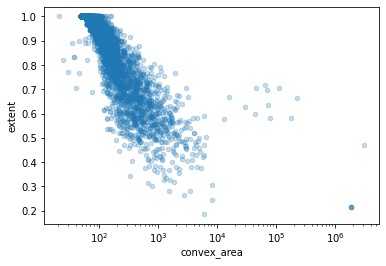

In [10]:
fig, ax = plt.subplots()
df.plot.scatter(x='convex_area', y='extent', ax=ax, alpha=0.25)
ax.set_xscale('log')

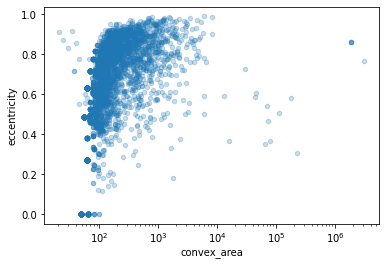

In [11]:
fig, ax = plt.subplots()
df.plot.scatter(x='convex_area', y='eccentricity', ax=ax, alpha=0.25)
ax.set_xscale('log')

In [12]:
# helpers.plot_image(helpers.remove_data_based_on_radius(labeled), cmap='nipy_spectral_r')

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>)

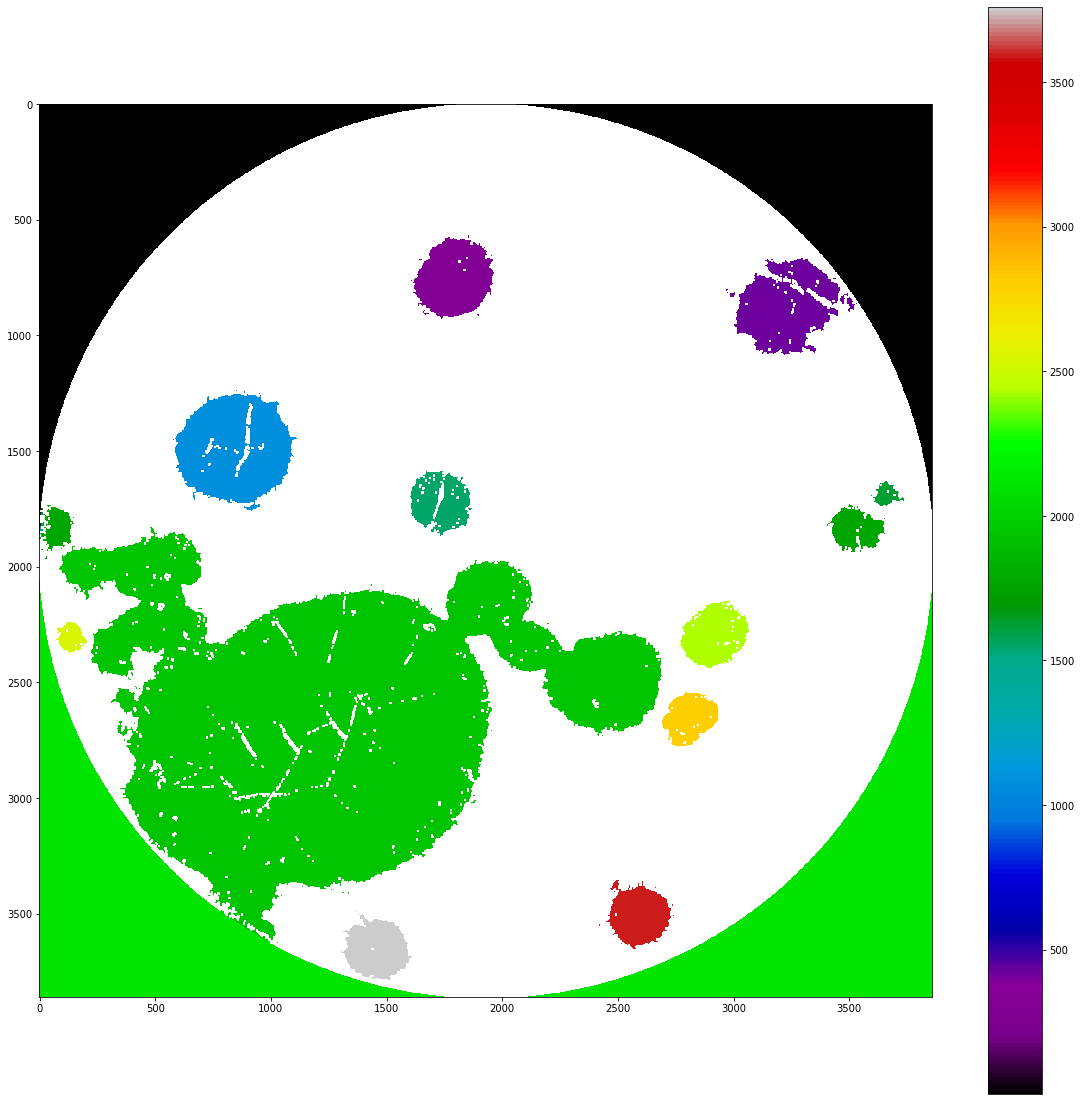

In [13]:
i = np.where(np.isin(labeled, df[df.convex_area > 10000].label.values), labeled, np.nan)
i = cv2.erode(i, np.ones((7, 7), np.uint8))
helpers.plot_image(i, cmap='nipy_spectral')

In [14]:
# import matplotlib
# current_cmap = matplotlib.cm.get_cmap()
# current_cmap.set_bad(color='red')
# plt.imshow(i)

In [15]:
np.where(np.isnan(i), i, 1)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

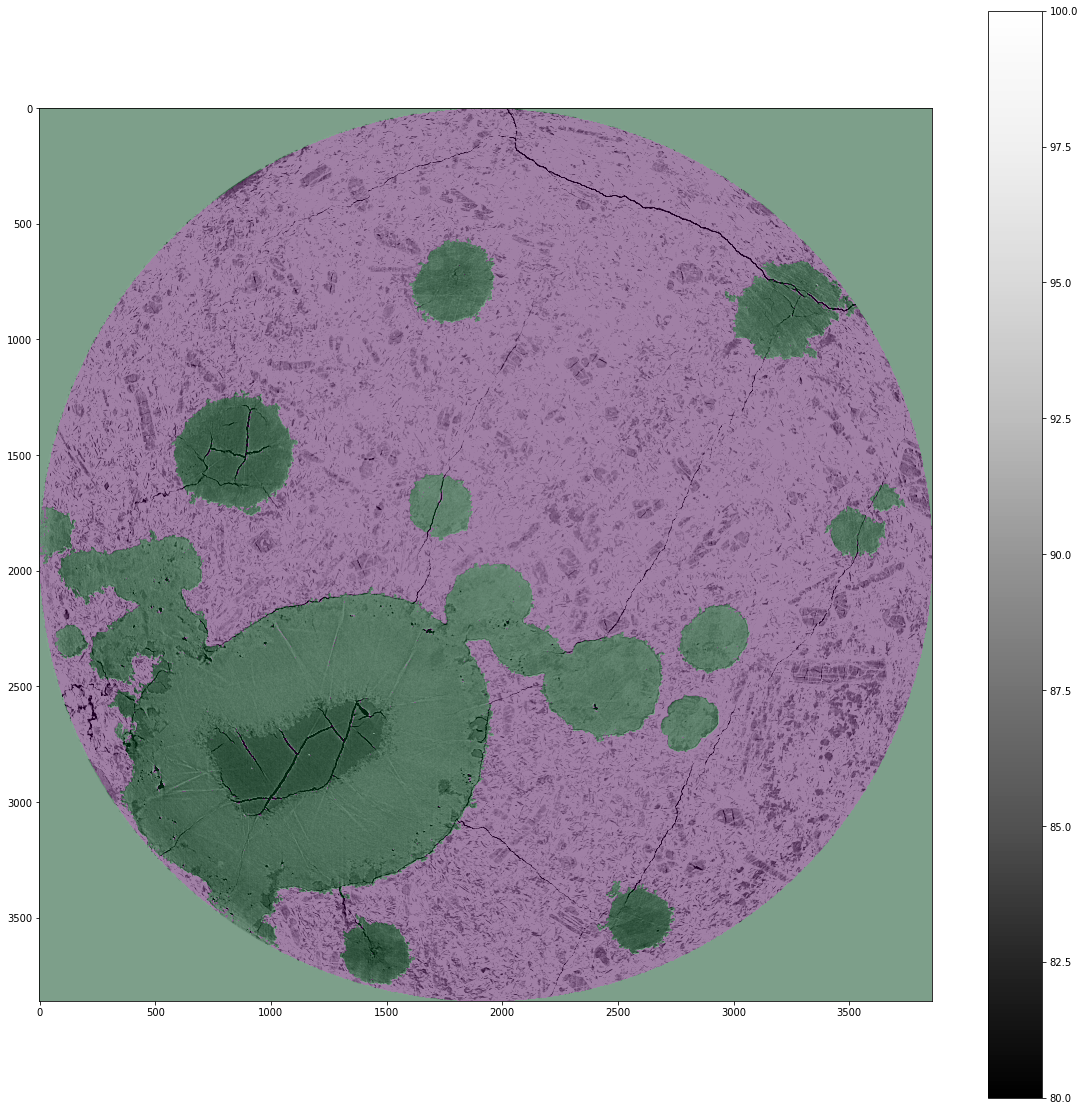

In [16]:
# img = cv2.imread(filename,0)

fig, ax = helpers.plot_image(img, vmin=80, vmax=100, cmap='Greys_r')
# ones_i = np.where(np.isnan(i), i, 1)
ones_i = np.where(np.isnan(i), -1, 1)
# ones_i = helpers.remove_data_based_on_radius(ones_i)
# ax.imshow(ones_i, alpha=0.5, cmap='Reds_r', interpolation='none')
ax.imshow(ones_i, alpha=0.5, cmap='PRGn', interpolation='none')

In [17]:
imarr_maskradius = helpers.remove_data_based_on_radius(img, mask_value=np.nan)
zim = helpers.zscore(imarr_maskradius)

zim_remove = zim.copy()
zim_remove[zim_remove > -2] = 0

x1, y1 = zim_remove.nonzero()

zeros = np.zeros_like(zim_remove)

zeros[x1, y1] = 1

# zeros = cv2.dilate(zeros, np.ones((2, 2), np.uint8))

# footprint condition says value should be greater
# in all directions
footprint1 = np.array(
    [[1, 1, 1]
    ,[1, 0, 1]
    ,[1, 1, 1]]
)

footprint2 = np.array(
    [[1, 1, 1, 1, 1]
    ,[1, 1, 1, 1, 1]
    ,[1, 1, 0, 1, 1]
    ,[1, 1, 1, 1, 1]
    ,[1, 1, 1, 1, 1]]
)

# creates a window based on the given footprint
# to compare neighbors and replace values on 
# nearest maximum value
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.maximum_filter.html
zeros = ndimage.median_filter(zeros, footprint=footprint1, mode='constant')
zeros = ndimage.maximum_filter(zeros, footprint=footprint2, mode='constant')

# zeros = cv2.erode(zeros, np.ones((4, 4), np.uint8))
# zeros = cv2.dilate(zeros, np.ones((4, 4), np.uint8))

labeled_fracs = label(zeros)
df = pd.DataFrame(regionprops_table(labeled_fracs, properties=['bbox', 'bbox_area', 'convex_area', 'eccentricity'
#                                             , 'equivalent_diameter' # this is the same as convex area more or less
                                            , 'extent', 'label', 'major_axis_length', 'minor_axis_length']))
i2 = np.where(np.isin(labeled_fracs, df[(df.convex_area > 60) & (df.eccentricity > 0.8)].label.values), zeros, np.nan)

i2

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

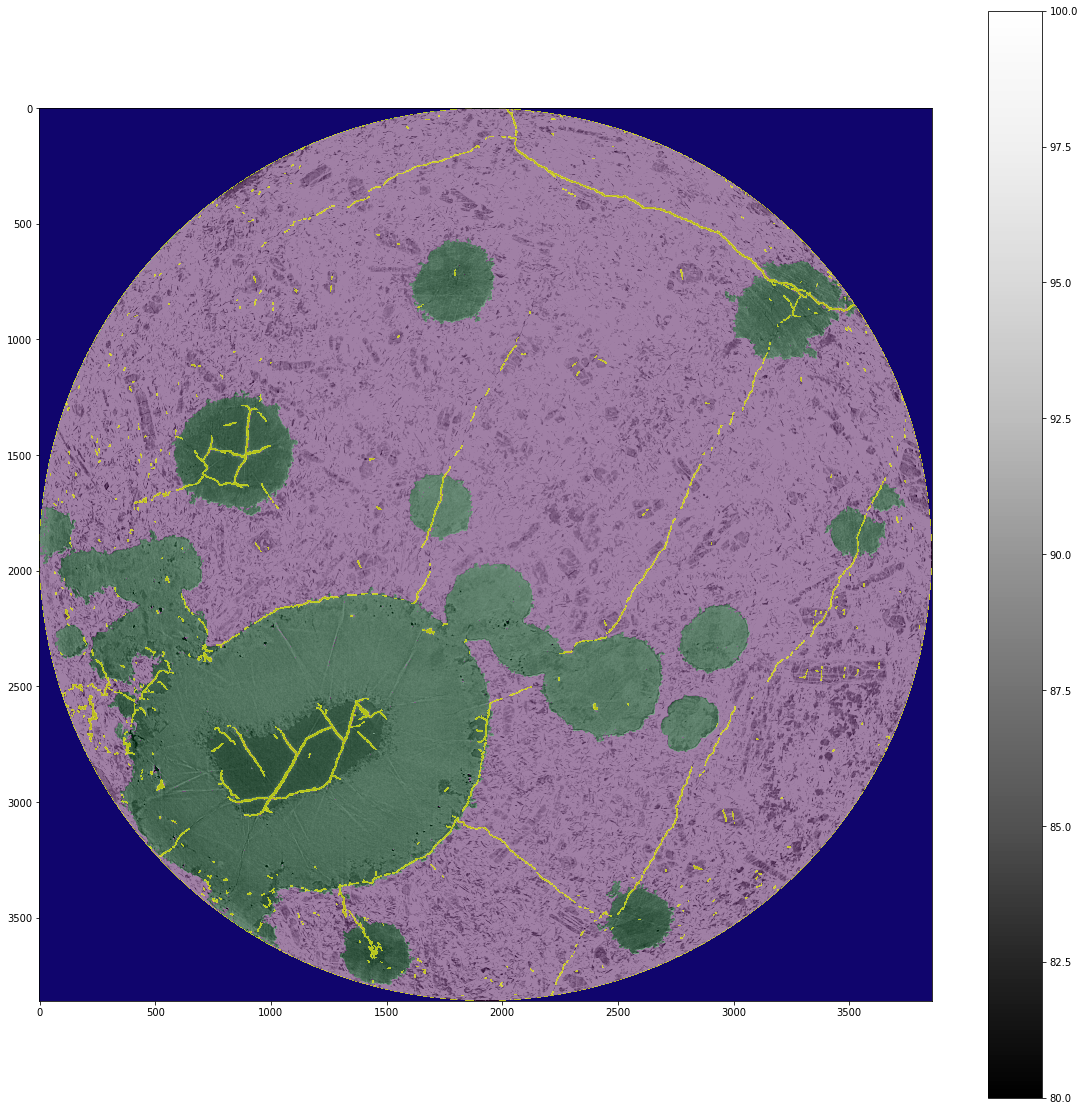

In [30]:
### img = cv2.imread(filename,0)

fig, ax = helpers.plot_image(helpers.remove_data_based_on_radius(img), vmin=80, vmax=100, cmap='Greys_r')
# ones_i = np.where(np.isnan(i), i, 1)
ones_i = np.where(np.isnan(i), -1, 1)
# ones_i = helpers.remove_data_based_on_radius(ones_i)
# ax.imshow(ones_i, alpha=0.5, cmap='Reds_r', interpolation='none')
ax.imshow(helpers.remove_data_based_on_radius(ones_i), alpha=0.5, cmap='PRGn', interpolation='none')
ax.imshow(helpers.remove_data_based_on_radius(i2), alpha=0.75, cmap='plasma', interpolation='none')

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>)

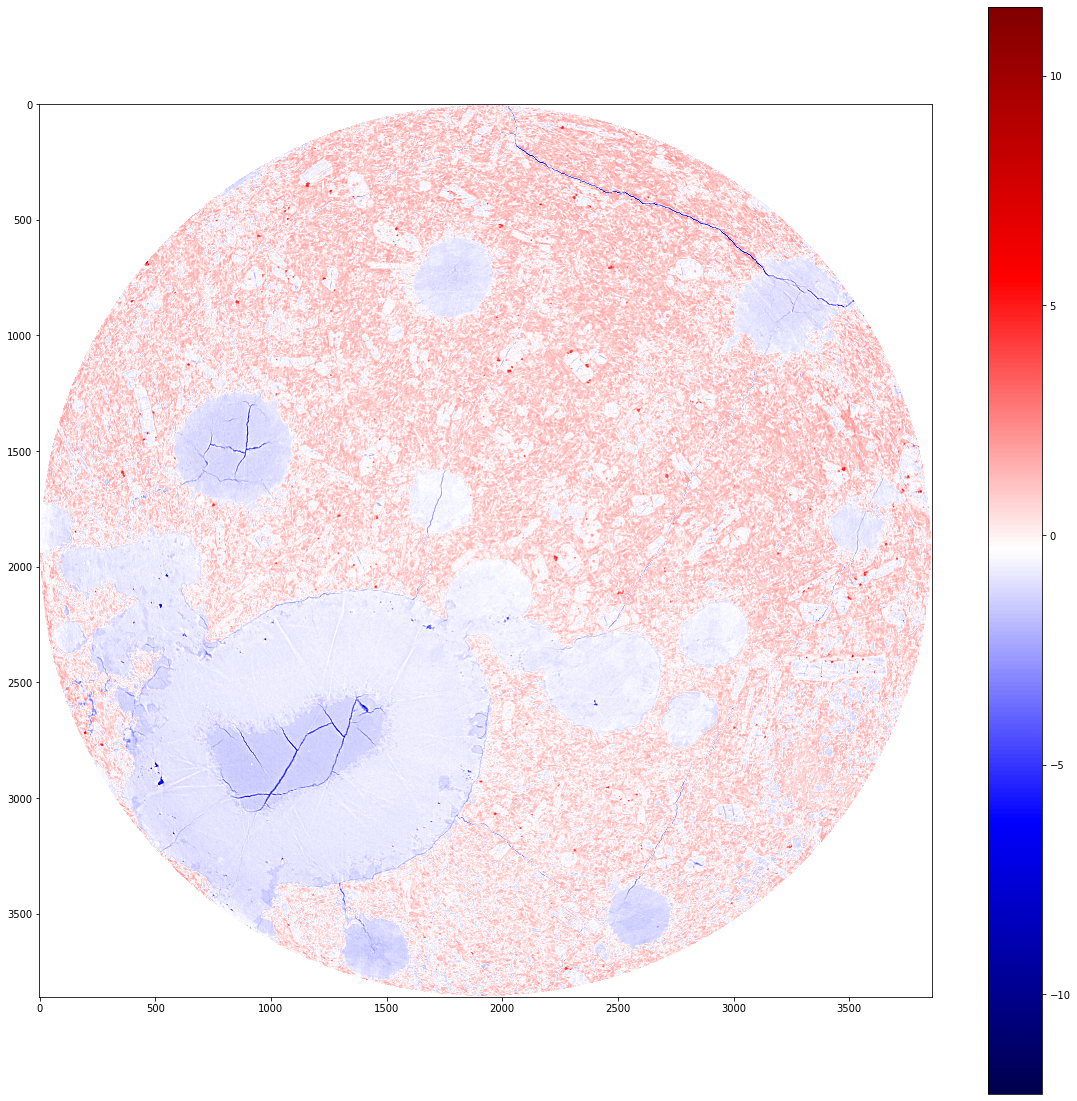

In [71]:
# # imarr_hist = exposure.equalize_hist(img)
# imarr_maskradius = helpers.remove_data_based_on_radius(imarr_hist, mask_value=np.nan)
# zim = helpers.zscore(imarr_maskradius)
# zim_remove = zim.copy()
# zim_remove[zim_remove > -1.75] = 0

# x1, y1 = zim_remove.nonzero()

# zeros = np.zeros_like(zim_remove)

# zeros[x1, y1] = 1

# fig, ax = plt.subplots(figsize=(15, 15))
# cbar = ax.imshow(zim_remove, cmap='Spectral')
# fig.colorbar(cbar)
imarr_maskradius = helpers.remove_data_based_on_radius(img, mask_value=np.nan)
zim = helpers.zscore(imarr_maskradius)
helpers.plot_image(zim, cmap='seismic', )

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>)

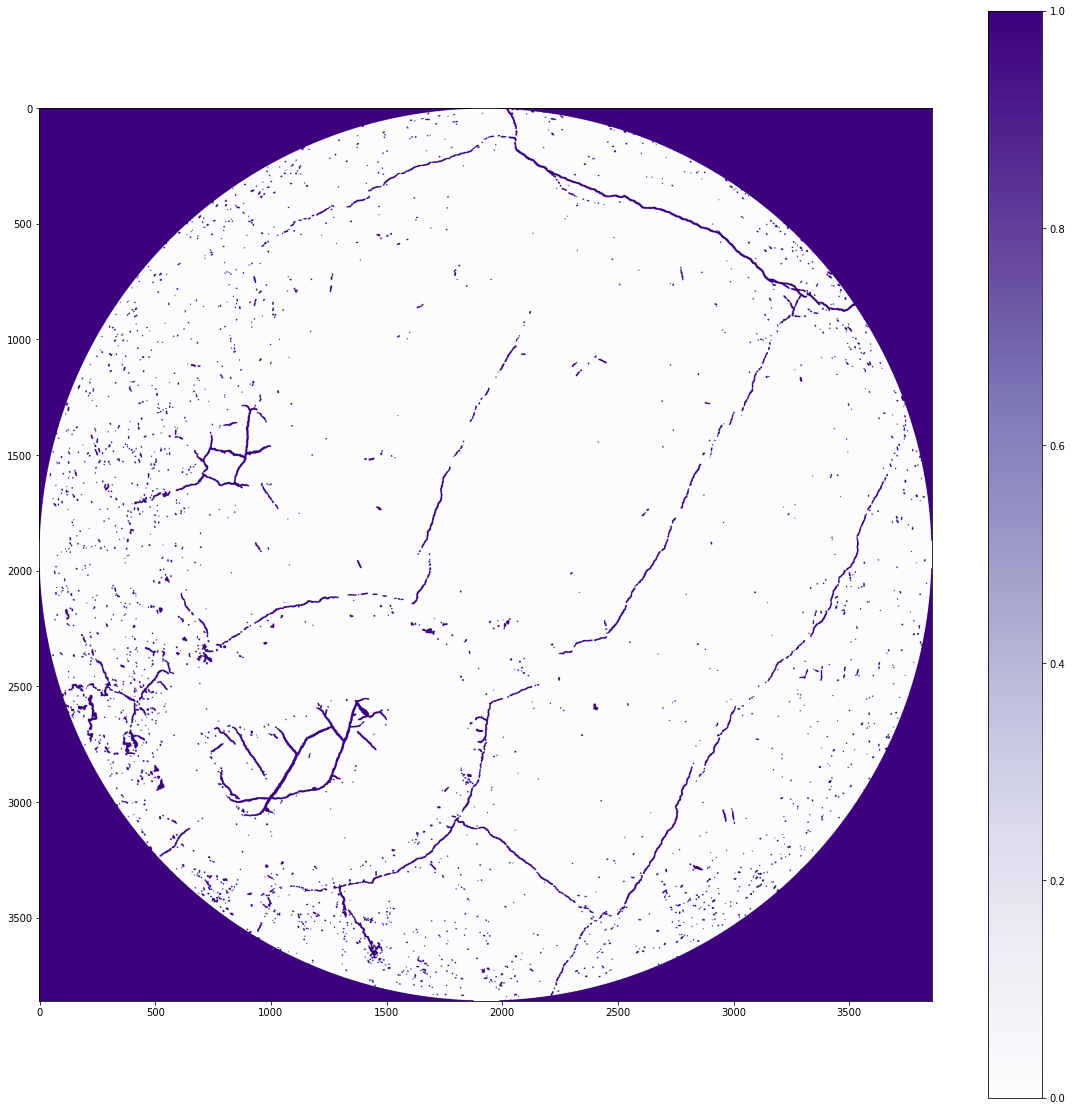

In [77]:
zim_remove = zim.copy()
zim_remove[zim_remove > -2] = 0

x1, y1 = zim_remove.nonzero()

zeros = np.zeros_like(zim_remove)

zeros[x1, y1] = 1

# zeros = cv2.dilate(zeros, np.ones((2, 2), np.uint8))

# footprint condition says value should be greater
# in all directions
footprint1 = np.array(
    [[1, 1, 1]
    ,[1, 0, 1]
    ,[1, 1, 1]]
)

footprint2 = np.array(
    [[1, 1, 1, 1, 1]
    ,[1, 1, 1, 1, 1]
    ,[1, 1, 0, 1, 1]
    ,[1, 1, 1, 1, 1]
    ,[1, 1, 1, 1, 1]]
)

# creates a window based on the given footprint
# to compare neighbors and replace values on 
# nearest maximum value
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.maximum_filter.html
zeros = ndimage.median_filter(zeros, footprint=footprint1, mode='constant')
zeros = ndimage.maximum_filter(zeros, footprint=footprint2, mode='constant')

# zeros = cv2.erode(zeros, np.ones((4, 4), np.uint8))
# zeros = cv2.dilate(zeros, np.ones((4, 4), np.uint8))


helpers.plot_image(zeros, cmap='Purples')

In [92]:
labeled_fracs = label(zeros)
df = pd.DataFrame(regionprops_table(labeled_fracs, properties=['bbox', 'bbox_area', 'convex_area', 'eccentricity'
#                                             , 'equivalent_diameter' # this is the same as convex area more or less
                                            , 'extent', 'label', 'major_axis_length', 'minor_axis_length']))

(0.0, 1000.0)

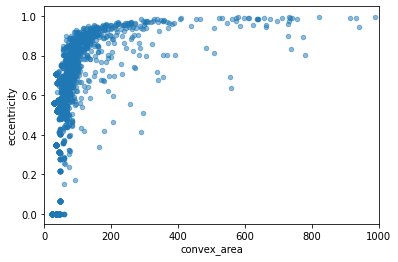

In [97]:
fig, ax = plt.subplots()

df.plot.scatter(x='convex_area', y='eccentricity', ax=ax, alpha=0.5)
ax.set_xlim(0, 1000)

<AxesSubplot:>

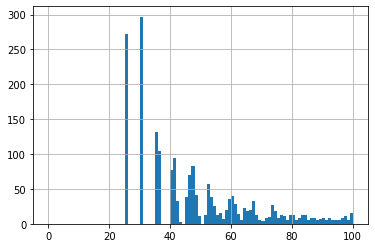

In [121]:
df.convex_area.hist(bins=np.linspace(0, 100, 101))

In [104]:
labeled_fracs

array([[   1,    1,    1, ...,    2,    2,    2],
       [   1,    1,    1, ...,    2,    2,    2],
       [   1,    1,    1, ...,    2,    2,    2],
       ...,
       [1032, 1032, 1032, ..., 1033, 1033, 1033],
       [1032, 1032, 1032, ..., 1033, 1033, 1033],
       [1032, 1032, 1032, ..., 1033, 1033, 1033]])

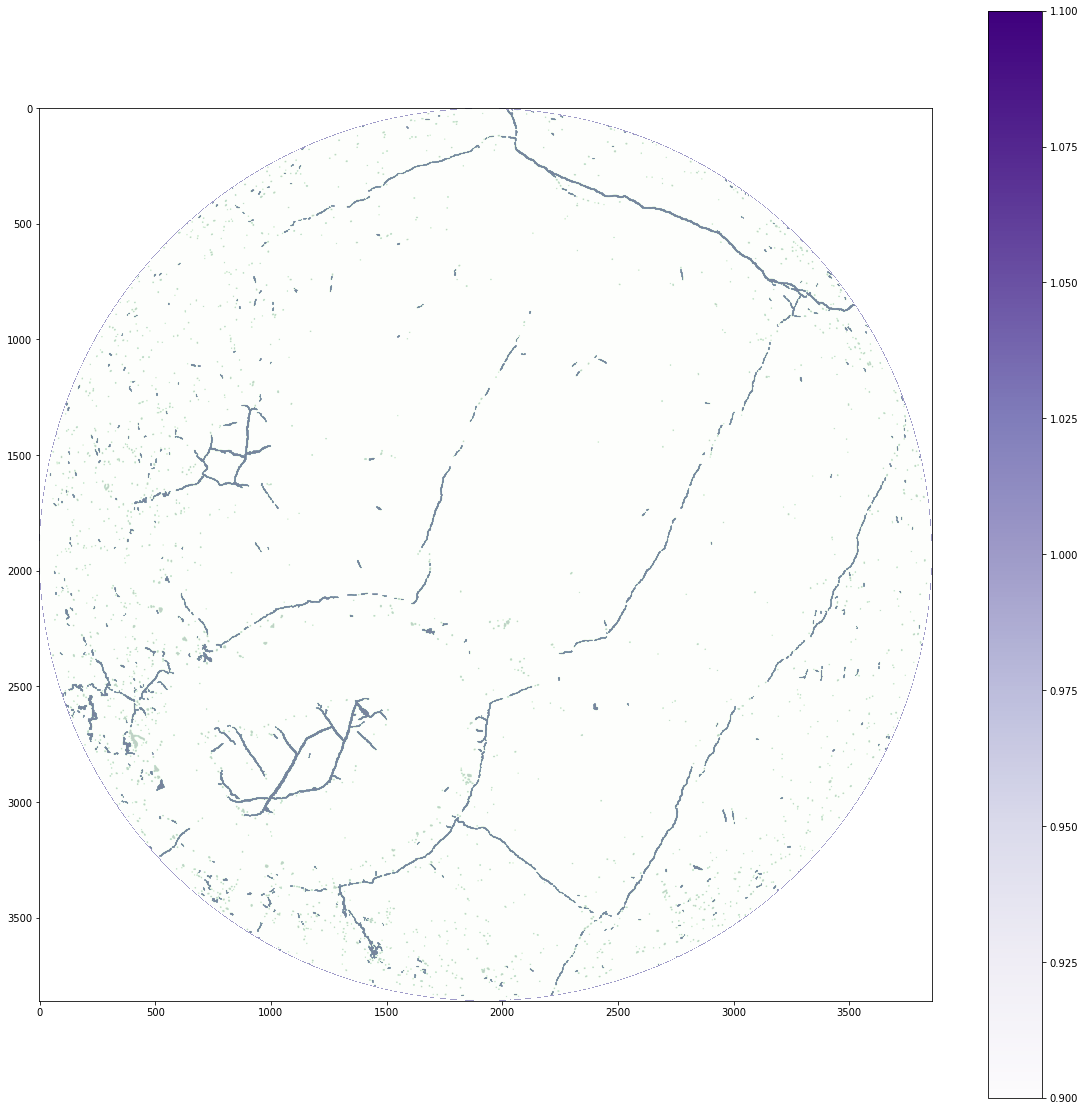

In [142]:
# i = np.where(np.isin(labeled_fracs, df[df.eccentricity > 0.8].label.values), zeros, np.nan)
i = np.where(np.isin(labeled_fracs, df[(df.convex_area > 60) & (df.eccentricity > 0.8)].label.values), zeros, np.nan)


fig, ax = helpers.plot_image(helpers.remove_data_based_on_radius(i, np.nan), cmap='Purples', interpolation='none')
ax.imshow(helpers.remove_data_based_on_radius(zeros, np.nan), alpha=0.25, cmap='Greens')

In [87]:
df[df.convex_area>50]

label  convex_area
0         1      1754989
1         2      1771802
2         3           60
6         7           65
9        10           57
...     ...          ...
2409   2410          110
2420   2421           52
2421   2422           60
2424   2425          104
2425   2426           83

[1174 rows x 2 columns]

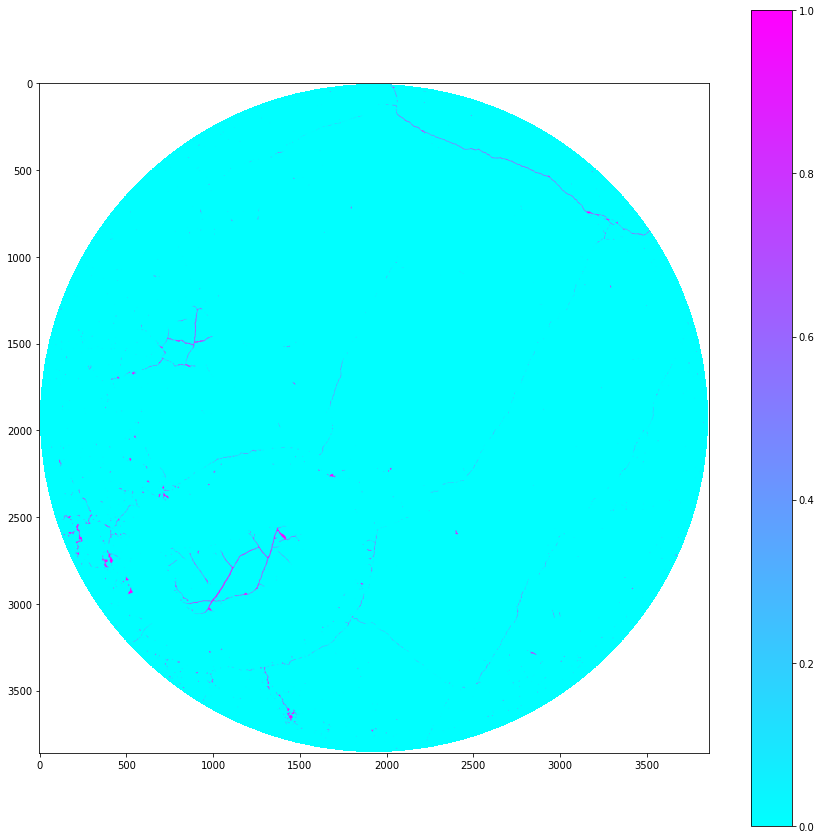

In [46]:
# footprint condition says value should be greater
# in all directions
footprint1 = np.array(
    [[1, 1, 1]
    ,[1, 0, 1]
    ,[1, 1, 1]]
)

footprint2 = np.array(
    [[1, 1, 1, 1, 1]
    ,[1, 1, 1, 1, 1]
    ,[1, 1, 0, 1, 1]
    ,[1, 1, 1, 1, 1]
    ,[1, 1, 1, 1, 1]]
)

# creates a window based on the given footprint
# to compare neighbors and replace values on 
# nearest maximum value
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.maximum_filter.html
newim = ndimage.median_filter(zeros, footprint=footprint1, mode='constant')
newim = ndimage.maximum_filter(newim, footprint=footprint2, mode='constant')
# newim = ndimage.maximum_filter(zim_remove, footprint=footprint2, mode='constant')

# fig, ax = plt.subplots(figsize=(15, 15))

imlabeled = newim
# i = cv2.erode(imlabeled, np.ones((7, 7), np.uint8))
# i = cv2.dilate(i, np.ones((7, 7), np.uint8))
# i = cv2.dilate(i, np.ones((7, 7), np.uint8))

# i = helpers.remove_data_based_on_radius(i, np.nan)
# i = helpers.remove_data_based_on_radius(imlabeled, np.nan)

# i = np.where(np.isin(labeled, df[df.convex_area > 10].label.values), labeled, np.nan)
i = cv2.erode(newim, np.ones((7, 7), np.uint8))
fig, ax = plt.subplots(figsize=(15, 15))

i = helpers.remove_data_based_on_radius(i, np.nan)

cbar = ax.imshow(i, cmap='cool')

fig.colorbar(cbar)

In [21]:
labeled = label(i)
df = regionprops_table(labeled, properties=['bbox', 'bbox_area', 'convex_area', 'eccentricity'
#                                             , 'equivalent_diameter' # this is the same as convex area more or less
                                            , 'extent', 'label', 'major_axis_length', 'minor_axis_length'])
df = pd.DataFrame(df)

df.head()

bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  eccentricity  \
0       0       0    1929    1929    3721041      1861485      0.860681   
1       0    1930    1929    3859    3721041      1861485      0.860681   
2       1       1    1870    1870    3493161       955808      0.980782   
3       1    1909       7    1914         30           30      0.560612   
4       1    1989    1870    3858    3493161      1058703      0.977058   

     extent  label  major_axis_length  minor_axis_length  
0  0.215131      1        1827.929402         930.680866  
1  0.215131      2        1827.929402         930.680866  
2  0.002532      3        3003.040931         585.919707  
3  1.000000      4           6.831301           5.656854  
4  0.009056      5        2465.944605         525.183490

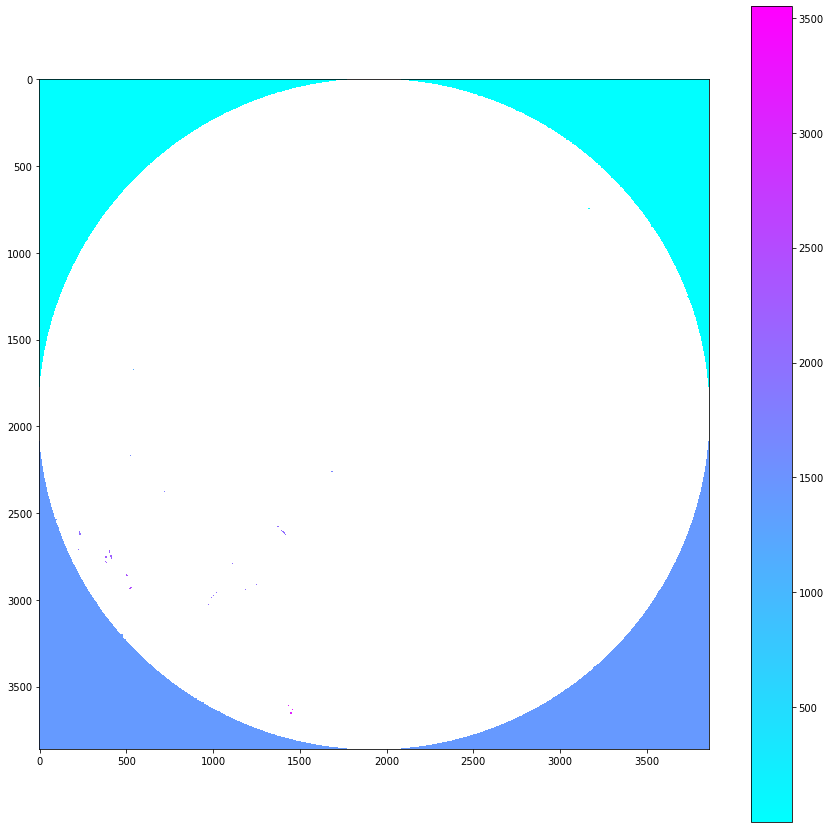

In [41]:
# i = np.where(np.isin(labeled, df[df.convex_area > 10].label.values), labeled, np.nan)
# i = cv2.erode(i, np.ones((7, 7), np.uint8))
fig, ax = plt.subplots(figsize=(15, 15))

cbar = ax.imshow(i, cmap='cool')

fig.colorbar(cbar)

<AxesSubplot:>

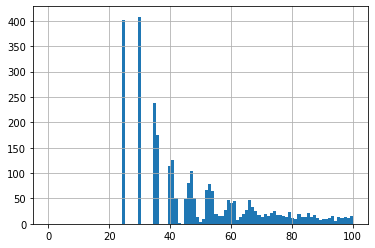

In [34]:
df.convex_area.hist(bins=np.linspace(0, 100, 100))

In [40]:
df[df.convex_area > 100]

bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  eccentricity  \
0          0       0    1929    1929    3721041      1861485      0.860681   
1          0    1930    1929    3859    3721041      1861485      0.860681   
2          1       1    1870    1870    3493161       955808      0.980782   
4          1    1989    1870    3858    3493161      1058703      0.977058   
17        43    2210      53    2234        240          192      0.949271   
...      ...     ...     ...     ...        ...          ...           ...   
3504    3765    1426    3782    1447        357          246      0.891142   
3505    3769    1646    3777    1660        112          103      0.850399   
3514    3776    1988    3802    2013        650          495      0.654452   
3516    3778    2231    3793    2239        120          116      0.853065   
3542    3827    2051    3835    2068        136          127      0.891844   

        extent  label  major_axis_length  minor_axis_length  
0     0.215131      1        1827.929402         930.680866  
1     0.215131      2        1827.929402         930.680866  
2     0.002532      3        3003.040931         585.919707  
4     0.009056      5        2465.944605         525.183490  
17    0.745833     18          27.190917           8.550442  
...        ...    ...                ...                ...  
3504  0.512605   3505          26.551060          12.046852  
3505  0.883929   3506          15.606639           8.211258  
3514  0.467692   3515          29.113089          22.012519  
3516  0.950000   3517          16.907468           8.822396  
3542  0.904412   3543          18.734793           8.474567  

[677 rows x 11 columns]